# Diagrama UML
![diagrama 2.drawio.png](<attachment:diagrama 2.drawio.png>)
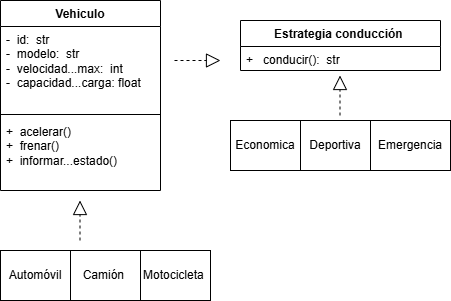

# Código Fuente

In [1]:
from abc import ABC, abstractmethod
from enum import Enum

# Patrón Strategy - Estrategias de conducción
class EstrategiaConduccion(ABC):
    @abstractmethod
    def acelerar(self, velocidad_actual, velocidad_maxima):
        pass

class ConduccionEconomica(EstrategiaConduccion):
    def acelerar(self, velocidad_actual, velocidad_maxima):
        return min(velocidad_actual + 5, velocidad_maxima * 0.8)

class ConduccionDeportiva(EstrategiaConduccion):
    def acelerar(self, velocidad_actual, velocidad_maxima):
        return min(velocidad_actual + 15, velocidad_maxima)

class ConduccionOffRoad(EstrategiaConduccion):
    def acelerar(self, velocidad_actual, velocidad_maxima):
        return min(velocidad_actual + 10, velocidad_maxima * 0.7)

class ConduccionEmergencia(EstrategiaConduccion):
    def acelerar(self, velocidad_actual, velocidad_maxima):
        return velocidad_actual + 20  # Puede exceder temporalmente la velocidad máxima

# Clase abstracta Vehículo
class Vehiculo(ABC):
    def __init__(self, id_vehiculo, modelo, velocidad_maxima, capacidad_carga):
        self._id_vehiculo = id_vehiculo
        self._modelo = modelo
        self._velocidad_maxima = velocidad_maxima
        self._capacidad_carga = capacidad_carga
        self._velocidad_actual = 0
        self._estrategia_conduccion = ConduccionEconomica()  # Estrategia por defecto
        
    # Getters y setters para encapsulamiento
    @property
    def id_vehiculo(self):
        return self._id_vehiculo
    
    @property
    def modelo(self):
        return self._modelo
    
    @property
    def velocidad_maxima(self):
        return self._velocidad_maxima
    
    @property
    def capacidad_carga(self):
        return self._capacidad_carga
    
    @property
    def velocidad_actual(self):
        return self._velocidad_actual
    
    def cambiar_estrategia_conduccion(self, estrategia):
        self._estrategia_conduccion = estrategia
    
    @abstractmethod
    def acelerar(self):
        pass
    
    @abstractmethod
    def frenar(self):
        pass
    
    def informar_estado(self):
        return f"Vehículo {self._modelo} - Velocidad: {self._velocidad_actual}/{self._velocidad_maxima} km/h"
    
    # Sobrecarga de operadores
    def __eq__(self, other):
        if not isinstance(other, Vehiculo):
            return False
        return self._modelo == other.modelo and self._velocidad_maxima == other.velocidad_maxima
    
    def __str__(self):
        return f"{self.__class__.__name__} {self._modelo} (ID: {self._id_vehiculo})"

# Subclases de Vehículo
class Automovil(Vehiculo):
    def acelerar(self):
        self._velocidad_actual = self._estrategia_conduccion.acelerar(
            self._velocidad_actual, self._velocidad_maxima)
        return f"Automóvil acelerando a {self._velocidad_actual} km/h"
    
    def frenar(self):
        self._velocidad_actual = max(0, self._velocidad_actual - 10)
        return "Automóvil frenando"

class Camion(Vehiculo):
    def __init__(self, id_vehiculo, modelo, velocidad_maxima, capacidad_carga):
        super().__init__(id_vehiculo, modelo, velocidad_maxima, capacidad_carga)
        self._remolques = 0
    
    def engranar_remolque(self):
        self._remolques += 1
        return f"Remolque engranado. Total: {self._remolques}"
    
    def acelerar(self):
        # Los camiones aceleran más lento cuando tienen remolques
        factor = 1 / (1 + self._remolques * 0.3)
        nueva_velocidad = self._estrategia_conduccion.acelerar(
            self._velocidad_actual, self._velocidad_maxima * factor)
        self._velocidad_actual = min(nueva_velocidad, self._velocidad_maxima * factor)
        return f"Camión acelerando a {self._velocidad_actual} km/h"
    
    def frenar(self):
        # Los camiones frenan más lento con remolques
        self._velocidad_actual = max(0, self._velocidad_actual - (8 / (1 + self._remolques * 0.2)))
        return "Camión frenando"

class Motocicleta(Vehiculo):
    def realizar_maniobra_evasiva(self):
        return "Realizando maniobra evasiva rápida"
    
    def acelerar(self):
        self._velocidad_actual = self._estrategia_conduccion.acelerar(
            self._velocidad_actual, self._velocidad_maxima)
        return f"Motocicleta acelerando rápidamente a {self._velocidad_actual} km/h"
    
    def frenar(self):
        self._velocidad_actual = max(0, self._velocidad_actual - 15)
        return "Motocicleta frenando bruscamente"

# Patrón Decorator
class VehiculoDecorator(Vehiculo):
    def __init__(self, vehiculo):
        self._vehiculo = vehiculo
    
    @property
    def id_vehiculo(self):
        return self._vehiculo.id_vehiculo
    
    @property
    def modelo(self):
        return self._vehiculo.modelo
    
    @property
    def velocidad_maxima(self):
        return self._vehiculo.velocidad_maxima
    
    @property
    def capacidad_carga(self):
        return self._vehiculo.capacidad_carga
    
    @property
    def velocidad_actual(self):
        return self._vehiculo.velocidad_actual
    
    def cambiar_estrategia_conduccion(self, estrategia):
        self._vehiculo.cambiar_estrategia_conduccion(estrategia)
    
    def acelerar(self):
        return self._vehiculo.acelerar()
    
    def frenar(self):
        return self._vehiculo.frenar()
    
    def informar_estado(self):
        return self._vehiculo.informar_estado()
    
    def __eq__(self, other):
        return self._vehiculo == other
    
    def __str__(self):
        return str(self._vehiculo)

class PilotoAutomaticoDecorator(VehiculoDecorator):
    def __init__(self, vehiculo):
        super().__init__(vehiculo)
        self._piloto_activo = False
    
    def activar_piloto_automatico(self):
        self._piloto_activo = True
        return "Piloto automático activado"
    
    def desactivar_piloto_automatico(self):
        self._piloto_activo = False
        return "Piloto automático desactivado"
    
    def acelerar(self):
        if self._piloto_activo:
            self._vehiculo.cambiar_estrategia_conduccion(ConduccionEconomica())
            self._vehiculo._velocidad_actual = min(
                self._vehiculo._velocidad_actual + 5, 
                self._vehiculo._velocidad_maxima * 0.9)
            return f"Piloto automático: {self._vehiculo.acelerar()}"
        return self._vehiculo.acelerar()
    
    def informar_estado(self):
        estado = self._vehiculo.informar_estado()
        if self._piloto_activo:
            estado += " (Piloto automático ACTIVO)"
        return estado

class AsistenteEstacionamientoDecorator(VehiculoDecorator):
    def estacionar(self):
        return "Asistente de estacionamiento activado: buscando espacio y estacionando"
    
    def informar_estado(self):
        return self._vehiculo.informar_estado() + " (Con asistente de estacionamiento)"

# Patrón Singleton - Control de Flota
class ControlDeFlota:
    _instancia = None
    
    def __new__(cls):
        if cls._instancia is None:
            cls._instancia = super().__new__(cls)
            cls._instancia._vehiculos = []
        return cls._instancia
    
    def agregar_vehiculo(self, vehiculo):
        self._vehiculos.append(vehiculo)
        return f"Vehículo {vehiculo.id_vehiculo} agregado a la flota"
    
    def listar_vehiculos(self):
        return [str(v) for v in self._vehiculos]
    
    # Sobrecarga del operador +
    def __add__(self, vehiculo):
        self.agregar_vehiculo(vehiculo)
        return self
    
    def __str__(self):
        return f"Control de Flota con {len(self._vehiculos)} vehículos"

# Ejemplo de uso
if __name__ == "__main__":
    # Crear instancia única del control de flota
    flota = ControlDeFlota()
    
    # Crear vehículos
    auto1 = Automovil("A001", "Tesla Model S", 250, 500)
    camion1 = Camion("C001", "Volvo FH16", 120, 20000)
    moto1 = Motocicleta("M001", "Harley Davidson", 180, 150)
    
    # Agregar vehículos a la flota (usando operador sobrecargado)
    flota + auto1
    flota + camion1
    flota + moto1
    
    # Aplicar decoradores
    auto_decorado = PilotoAutomaticoDecorator(auto1)
    camion_decorado = AsistenteEstacionamientoDecorator(camion1)
    flota + auto_decorado
    flota + camion_decorado
    
    # Probar estrategias de conducción
    print("\n--- Prueba de estrategias de conducción ---")
    auto1.cambiar_estrategia_conduccion(ConduccionDeportiva())
    print(auto1.acelerar())
    print(auto1.acelerar())
    
    camion1.cambiar_estrategia_conduccion(ConduccionOffRoad())
    print(camion1.acelerar())
    print(camion1.engranar_remolque())
    print(camion1.acelerar())
    
    moto1.cambiar_estrategia_conduccion(ConduccionEmergencia())
    print(moto1.acelerar())
    print(moto1.realizar_maniobra_evasiva())
    
    # Probar decoradores
    print("\n--- Prueba de decoradores ---")
    print(auto_decorado.activar_piloto_automatico())
    print(auto_decorado.acelerar())
    print(auto_decorado.informar_estado())
    
    print(camion_decorado.estacionar())
    print(camion_decorado.informar_estado())
    
    # Probar sobrecarga de operadores
    print("\n--- Prueba de sobrecarga de operadores ---")
    auto2 = Automovil("A002", "Tesla Model S", 250, 500)
    print(f"¿auto1 == auto2? {auto1 == auto2}")  # True (mismo modelo y velocidad máxima)
    
    auto3 = Automovil("A003", "Tesla Model 3", 220, 450)
    print(f"¿auto1 == auto3? {auto1 == auto3}")  # False
    
    # Mostrar flota
    print("\n--- Vehículos en la flota ---")
    for vehiculo in flota.listar_vehiculos():
        print(vehiculo)
    
    print(flota)


--- Prueba de estrategias de conducción ---
Automóvil acelerando a 15 km/h
Automóvil acelerando a 30 km/h
Camión acelerando a 10 km/h
Remolque engranado. Total: 1
Camión acelerando a 20 km/h
Motocicleta acelerando rápidamente a 20 km/h
Realizando maniobra evasiva rápida

--- Prueba de decoradores ---
Piloto automático activado
Piloto automático: Automóvil acelerando a 40 km/h
Vehículo Tesla Model S - Velocidad: 40/250 km/h (Piloto automático ACTIVO)
Asistente de estacionamiento activado: buscando espacio y estacionando
Vehículo Volvo FH16 - Velocidad: 20/120 km/h (Con asistente de estacionamiento)

--- Prueba de sobrecarga de operadores ---
¿auto1 == auto2? True
¿auto1 == auto3? False

--- Vehículos en la flota ---
Automovil Tesla Model S (ID: A001)
Camion Volvo FH16 (ID: C001)
Motocicleta Harley Davidson (ID: M001)
Automovil Tesla Model S (ID: A001)
Camion Volvo FH16 (ID: C001)
Control de Flota con 5 vehículos


# Explicación de decisiones de diseño

- Abstracción y Encapsulamiento:

La clase abstracta Vehiculo define la interfaz común para todos los vehículos.

Los atributos son protegidos (_) y se acceden mediante propiedades (@property).

- Herencia y Polimorfismo:

Las subclases Automovil, Camion y Motocicleta implementan comportamientos específicos.

Cada tipo de vehículo tiene su propia implementación de acelerar() y frenar().

- Patrones de Diseño:

Strategy: Las estrategias de conducción pueden cambiarse dinámicamente.

Decorator: Se añaden funcionalidades (piloto automático, asistente) sin modificar las clases base.

Singleton: ControlDeFlota garantiza una única instancia global.

- Sobrecarga de Operadores:

_eq_ compara vehículos por modelo y velocidad máxima.
_add_ permite añadir vehículos a la flota con sintaxis intuitiva.

- Extensibilidad:
 El diseño permite fácil adición de nuevos tipos de vehículos, estrategias o decoradores.